**Imports**

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install findspark

In [3]:
!pip install pyspark

     |████████████████████████████████| 204.7MB 61kB/s 
     |████████████████████████████████| 204kB 52.8MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044184 sha256=38e44b9d7888218033a515ae437192b74f02b3c23ab451559be70c01cae1118a
  Stored in directory: /root/.cache/pip/wheels/57/27/4d/ddacf7143f8d5b76c45c61ee2e43d9f8492fc5a8e78ebd7d37
Successfully built pyspark


In [4]:
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder.appName('quick-hands-on').getOrCreate()

In [7]:
spark_df= spark.read.option("header","true").option("inferSchema", "true").csv("/content/drive/My Drive/MICRODADOS_ENEM_2018.csv",sep = ";", encoding='iso-8859-1')

In [22]:
dic = pd.read_csv("/content/drive/My Drive/dicionario_microdados.csv",sep=";")

In [23]:
dicionario = dic.set_index('variavel')['descricao'].to_dict()

In [10]:
spark_df.show(5)

+------------+------+-----------------------+-----------------------+----------------+----------------+--------+-------+---------------+-----------+----------------+-----------------------+-----------------------+----------------+----------------+---------------+---------------+---------+---------+------------+---------+----------------+----------------+---------+---------+----------------------+------------------+---------------+--------------+-----------+---------+-----------------------+-----------------+---------------------+---------------------+------------------+-----------+--------------+----------+------------------+------------+-----------+-----------+--------+---------------------------+--------------+----------+--------------+--------------+--------+---------+--------------+---------+-----------------+---------------------+------------------------+--------------+------------------+-------------+-------------------+------------------+---------------------+----------------+--

In [24]:
dicionario

{'CO_ESCOLA': 'Código da Escola4',
 'CO_MUNICIPIO_ESC': 'Código do município da escola ',
 'CO_MUNICIPIO_NASCIMENTO': 'Código do município de nascimento',
 'CO_MUNICIPIO_PROVA': 'Código do município da aplicação da prova',
 'CO_MUNICIPIO_RESIDENCIA': 'Código do município de residência ',
 'CO_PROVA_CH': 'Código do tipo de prova de Ciências Humanas',
 'CO_PROVA_CN': 'Código do tipo de prova de Ciências da Natureza',
 'CO_PROVA_LC': 'Código do tipo de prova de Linguagens e Códigos',
 'CO_PROVA_MT': 'Código do tipo de prova de Matemática',
 'CO_UF_ESC': 'Código da Unidade da Federação da escola',
 'CO_UF_NASCIMENTO': 'Código da Unidade da Federação de nascimento',
 'CO_UF_PROVA': 'Código da Unidade da Federação da aplicação da prova',
 'CO_UF_RESIDENCIA': 'Código da Unidade da Federação de residência',
 'IN_TREINEIRO': 'Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos3',
 'NO_MUNICIPIO_ESC': 'Nome do município da escola',
 'NO_MUNICIPIO_NASCIMENTO': 'Nome 

In [13]:
df = spark_df

Variáveis e registros

In [14]:
print((df.count(), len(df.columns)))

(5513747, 137)


Remover colunas(variaveis) sem valor preditivo, ex: código de municipio

In [15]:
columns_to_drop =['NU_INSCRICAO','NU_ANO','CO_MUNICIPIO_RESIDENCIA','CO_UF_RESIDENCIA', 'CO_MUNICIPIO_NASCIMENTO','CO_UF_NASCIMENTO','CO_ESCOLA','CO_MUNICIPIO_ESC','CO_UF_ESC','TP_SIT_FUNC_ESC','CO_MUNICIPIO_PROVA','CO_UF_PROVA','CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT','TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT']
df = df.drop(*columns_to_drop)

In [25]:
for var in columns_to_drop:
  valor = dicionario[var]
  print(var,"-",valor)

NU_INSCRICAO - Numero de inscrição
NU_ANO - Ano do Enem
CO_MUNICIPIO_RESIDENCIA - Código do município de residência 
CO_UF_RESIDENCIA - Código da Unidade da Federação de residência
CO_MUNICIPIO_NASCIMENTO - Código do município de nascimento
CO_UF_NASCIMENTO - Código da Unidade da Federação de nascimento
CO_ESCOLA - Código da Escola4
CO_MUNICIPIO_ESC - Código do município da escola 
CO_UF_ESC - Código da Unidade da Federação da escola
TP_SIT_FUNC_ESC - Situação de funcionamento (Escola)
CO_MUNICIPIO_PROVA - Código do município da aplicação da prova
CO_UF_PROVA - Código da Unidade da Federação da aplicação da prova
CO_PROVA_CN - Código do tipo de prova de Ciências da Natureza
CO_PROVA_CH - Código do tipo de prova de Ciências Humanas
CO_PROVA_LC - Código do tipo de prova de Linguagens e Códigos
CO_PROVA_MT - Código do tipo de prova de Matemática
TX_RESPOSTAS_CN - Vetor com as respostas da parte objetiva da prova de Ciências da Natureza8 
TX_RESPOSTAS_CH - Vetor com as respostas da parte o

In [26]:
#Total de variaveis excluidas
len(columns_to_drop)

24

Retirar colunas sem valor preditivo ou excludentes - ex: portador de alguma deficiencia

In [29]:
columns_drop = ['IN_BAIXA_VISAO','IN_CEGUEIRA','IN_SURDEZ','IN_DEFICIENCIA_AUDITIVA','IN_SURDO_CEGUEIRA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_MENTAL','IN_DEFICIT_ATENCAO','IN_DISLEXIA','IN_DISCALCULIA','IN_AUTISMO','IN_VISAO_MONOCULAR','IN_OUTRA_DEF','IN_GESTANTE','IN_LACTANTE','IN_IDOSO','IN_ESTUDA_CLASSE_HOSPITALAR','IN_SEM_RECURSO','IN_BRAILLE','IN_AMPLIADA_24','IN_AMPLIADA_18','IN_LEDOR','IN_ACESSO','IN_TRANSCRICAO','IN_LIBRAS','IN_LEITURA_LABIAL','IN_MESA_CADEIRA_RODAS','IN_MESA_CADEIRA_SEPARADA','IN_APOIO_PERNA','IN_GUIA_INTERPRETE','IN_COMPUTADOR','IN_CADEIRA_ESPECIAL','IN_CADEIRA_CANHOTO','IN_CADEIRA_ACOLCHOADA','IN_PROVA_DEITADO','IN_MOBILIARIO_OBESO','IN_LAMINA_OVERLAY','IN_PROTETOR_AURICULAR','IN_MEDIDOR_GLICOSE','IN_MAQUINA_BRAILE','IN_SOROBAN','IN_MARCA_PASSO','IN_SONDA','IN_MEDICAMENTOS','IN_SALA_INDIVIDUAL','IN_SALA_ESPECIAL','IN_SALA_ACOMPANHANTE','IN_MOBILIARIO_ESPECIFICO','IN_MATERIAL_ESPECIFICO','IN_NOME_SOCIAL']

In [30]:
len(columns_drop)

50

In [28]:
for var in columns_drop:
  valor = dicionario[var]
  print(var,"-",valor)

KeyError: ignored

In [31]:
df = df.drop(*columns_drop)

In [32]:
print(len(df.columns))

63


In [ ]:
df.dtypes

[('NO_MUNICIPIO_RESIDENCIA', 'string'),
 ('SG_UF_RESIDENCIA', 'string'),
 ('NU_IDADE', 'int'),
 ('TP_SEXO', 'string'),
 ('TP_ESTADO_CIVIL', 'int'),
 ('TP_COR_RACA', 'int'),
 ('TP_NACIONALIDADE', 'int'),
 ('NO_MUNICIPIO_NASCIMENTO', 'string'),
 ('SG_UF_NASCIMENTO', 'string'),
 ('TP_ST_CONCLUSAO', 'int'),
 ('TP_ANO_CONCLUIU', 'int'),
 ('TP_ESCOLA', 'int'),
 ('TP_ENSINO', 'int'),
 ('IN_TREINEIRO', 'int'),
 ('NO_MUNICIPIO_ESC', 'string'),
 ('SG_UF_ESC', 'string'),
 ('TP_DEPENDENCIA_ADM_ESC', 'int'),
 ('TP_LOCALIZACAO_ESC', 'int'),
 ('NO_MUNICIPIO_PROVA', 'string'),
 ('SG_UF_PROVA', 'string'),
 ('TP_PRESENCA_CN', 'int'),
 ('TP_PRESENCA_CH', 'int'),
 ('TP_PRESENCA_LC', 'int'),
 ('TP_PRESENCA_MT', 'int'),
 ('NU_NOTA_CN', 'double'),
 ('NU_NOTA_CH', 'double'),
 ('NU_NOTA_LC', 'double'),
 ('NU_NOTA_MT', 'double'),
 ('TP_LINGUA', 'int'),
 ('TP_STATUS_REDACAO', 'int'),
 ('NU_NOTA_COMP1', 'int'),
 ('NU_NOTA_COMP2', 'int'),
 ('NU_NOTA_COMP3', 'int'),
 ('NU_NOTA_COMP4', 'int'),
 ('NU_NOTA_COMP5', 'in

Calculo de média geral

In [33]:
from pyspark.sql.functions import col, round, lit

In [34]:
Notas = [col("NU_NOTA_CN"), col('NU_NOTA_CH'), col('NU_NOTA_LC'), col('NU_NOTA_MT'), col('NU_NOTA_REDACAO')]
averageFunc = sum(x for x in Notas)/len(Notas)
df = df.withColumn('MEDIA_FINAL', averageFunc)
df = df.withColumn('MEDIA_FINAL', round(df['MEDIA_FINAL'], 2))

In [35]:
df.show()

+-----------------------+----------------+--------+-------+---------------+-----------+----------------+-----------------------+----------------+---------------+---------------+---------+---------+------------+----------------+---------+----------------------+------------------+------------------+-----------+--------------+--------------+--------------+--------------+----------+----------+----------+----------+---------+-----------------+-------------+-------------+-------------+-------------+-------------+---------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----------+
|NO_MUNICIPIO_RESIDENCIA|SG_UF_RESIDENCIA|NU_IDADE|TP_SEXO|TP_ESTADO_CIVIL|TP_COR_RACA|TP_NACIONALIDADE|NO_MUNICIPIO_NASCIMENTO|SG_UF_NASCIMENTO|TP_ST_CONCLUSAO|TP_ANO_CONCLUIU|TP_ESCOLA|TP_ENSINO|IN_TREINEIRO|NO_MUNICIPIO_ESC|SG_UF_ESC|TP_DEPENDENCIA_ADM_ESC|TP_LOCALIZACAO_ESC|NO_MUNICIPIO_PROVA|SG_UF_PROVA|TP_PRESENCA_CN

Adicionar coluna de classificação
0 = Classificado
1 = desclassificado

In [36]:
df = df.withColumn("Classificado",lit(1))

In [37]:
from pyspark.sql.functions import isnan, when, count, col

In [38]:
df = df.withColumn('Classificado',when((df.MEDIA_FINAL < 450) | (df.NU_NOTA_REDACAO == 0), df.Classificado).otherwise(0))

In [42]:
df.show()

+-----------------------+----------------+--------+-------+---------------+-----------+----------------+-----------------------+----------------+---------------+---------------+---------+---------+------------+----------------+---------+----------------------+------------------+------------------+-----------+--------------+--------------+--------------+--------------+----------+----------+----------+----------+---------+-----------------+-------------+-------------+-------------+-------------+-------------+---------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----------+------------+
|NO_MUNICIPIO_RESIDENCIA|SG_UF_RESIDENCIA|NU_IDADE|TP_SEXO|TP_ESTADO_CIVIL|TP_COR_RACA|TP_NACIONALIDADE|NO_MUNICIPIO_NASCIMENTO|SG_UF_NASCIMENTO|TP_ST_CONCLUSAO|TP_ANO_CONCLUIU|TP_ESCOLA|TP_ENSINO|IN_TREINEIRO|NO_MUNICIPIO_ESC|SG_UF_ESC|TP_DEPENDENCIA_ADM_ESC|TP_LOCALIZACAO_ESC|NO_MUNICIPIO_PROVA|SG_UF_PROVA|T

In [43]:
df.groupBy('Classificado').count().show()

+------------+-------+
|Classificado|  count|
+------------+-------+
|           1| 708670|
|           0|4805077|
+------------+-------+



In [ ]:
print(len(df.columns))

65


**Total de desclassificados sem filtros**

In [40]:
df_desclassificados = df.filter((col('MEDIA_FINAL') < 450) | (col('NU_NOTA_REDACAO') == 0))

In [41]:
df_desclassificados.count()

KeyboardInterrupt: ignored

**Filtros de exclusão**

**Treineiros**

Verificar quantidade de treineiros

In [ ]:
df_treineiros = df.filter(df['IN_TREINEIRO'] == 1)

In [ ]:
df_treineiros.count()

527709

porcentagem de Treineiros

In [ ]:
total = (527709/5513747)*100
print(total)

9.570787342981097


In [ ]:
total = ((df_treineiros.count())/(df.count()))*100

KeyboardInterrupt: ignored

In [ ]:
print(round(total,2))

TypeError: ignored

Remover os treineiros

In [ ]:
df = df.filter(df['IN_TREINEIRO'] == 0)

In [ ]:
#df.count()

**Remover candidatos que ainda que não concluíram e nem estão cursando o ensino médio no ano do exame**

In [ ]:
#Dicionario com respostas
ST_CONCLUSAO_DIC = {
    '1': 'Já concluí o Ensino Médio',
    '2': 'Estou cursando e concluirei o Ensino Médio em 2018',
    '3': 'Estou cursando e concluirei o Ensino Médio após 2018',
    '4': 'Não concluí e não estou cursando o Ensino Médio',
}


In [ ]:
df.groupBy('TP_ST_CONCLUSAO').count().show()

+---------------+-------+
|TP_ST_CONCLUSAO|  count|
+---------------+-------+
|              1|3233968|
|              3|  59230|
|              4|  52741|
|              2|1640099|
+---------------+-------+



In [ ]:
df = df.filter("TP_ST_CONCLUSAO <3")

In [ ]:
#df.count()

**Candidatos eliminados e ausentes na prova**

In [ ]:
colunas_presenca = ['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT']

In [ ]:
TP_PRESENCA_DIC = {
    '0': 'Faltou à prova',
    '1': 'Presente na prova',
    '2': 'Eliminado na prova',
}

Provas CN e MT foram realizadas no mesmo dia, assim como CH e LC

In [ ]:
for coluna in colunas_presenca:
  df.groupBy(coluna).count().show()

+--------------+-------+
|TP_PRESENCA_CN|  count|
+--------------+-------+
|          null|    148|
|             1|3376981|
|             2|    606|
|             0|1496332|
+--------------+-------+

+--------------+-------+
|TP_PRESENCA_CH|  count|
+--------------+-------+
|          null|    148|
|             1|3584583|
|             2|   1667|
|             0|1287669|
+--------------+-------+

+--------------+-------+
|TP_PRESENCA_LC|  count|
+--------------+-------+
|          null|    148|
|             1|3584583|
|             2|   1667|
|             0|1287669|
+--------------+-------+

+--------------+-------+
|TP_PRESENCA_MT|  count|
+--------------+-------+
|          null|    148|
|             1|3376981|
|             2|    606|
|             0|1496332|
+--------------+-------+



In [ ]:
df = df.filter("TP_PRESENCA_CN = 1 and TP_PRESENCA_CH = 1")

In [ ]:
df.count()

3369117

In [ ]:
df.show()

Double check treineiros e presença

In [ ]:
df.filter(df['IN_TREINEIRO'] == 0).count()

KeyboardInterrupt: ignored

In [ ]:
colunas_presenca = ['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT']

In [ ]:
for coluna in colunas_presenca:
  df.groupBy(coluna).count().show()

Remover colunas (variaveis) redundantes

In [44]:
drop_columns = ['IN_TREINEIRO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT']

In [ ]:
df = df.drop(*drop_columns)

In [45]:
for var in drop_columns:
  valor = dicionario[var]
  print(var,"-",valor)

IN_TREINEIRO - Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos3
TP_PRESENCA_CN - Presença na prova objetiva de Ciências da Natureza
TP_PRESENCA_CH - Presença na prova objetiva de Ciências Humanas
TP_PRESENCA_LC - Presença na prova objetiva de Linguagens e Códigos
TP_PRESENCA_MT - Presença na prova objetiva de Matemática


In [ ]:
print(len(df.columns))

60


In [ ]:
df.show(5)

+-----------------------+----------------+--------+-------+---------------+-----------+----------------+-----------------------+----------------+---------------+---------------+---------+---------+----------------+---------+----------------------+------------------+------------------+-----------+----------+----------+----------+----------+---------+-----------------+-------------+-------------+-------------+-------------+-------------+---------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----------+------------+
|NO_MUNICIPIO_RESIDENCIA|SG_UF_RESIDENCIA|NU_IDADE|TP_SEXO|TP_ESTADO_CIVIL|TP_COR_RACA|TP_NACIONALIDADE|NO_MUNICIPIO_NASCIMENTO|SG_UF_NASCIMENTO|TP_ST_CONCLUSAO|TP_ANO_CONCLUIU|TP_ESCOLA|TP_ENSINO|NO_MUNICIPIO_ESC|SG_UF_ESC|TP_DEPENDENCIA_ADM_ESC|TP_LOCALIZACAO_ESC|NO_MUNICIPIO_PROVA|SG_UF_PROVA|NU_NOTA_CN|NU_NOTA_CH|NU_NOTA_LC|NU_NOTA_MT|TP_LINGUA|TP_STATUS_REDACAO|NU_NOTA_COMP1|N

**Analise exploratoria**

***Variavais qualitativas***

In [ ]:
qualitativas=["NO_MUNICIPIO_RESIDENCIA","SG_UF_RESIDENCIA","TP_SEXO","TP_ESTADO_CIVIL","TP_COR_RACA","TP_NACIONALIDADE","NO_MUNICIPIO_NASCIMENTO","SG_UF_NASCIMENTO","TP_ST_CONCLUSAO","TP_ANO_CONCLUIU","TP_ESCOLA","TP_ENSINO","NO_MUNICIPIO_ESC","SG_UF_ESC","TP_DEPENDENCIA_ADM_ESC","TP_LOCALIZACAO_ESC","NO_MUNICIPIO_PROVA","SG_UF_PROVA","TP_LINGUA","TP_STATUS_REDACAO","Q001","Q002","Q003","Q004","Q005","Q006","Q007","Q008","Q009","Q010","Q011","Q012","Q013","Q014","Q015","Q016","Q017","Q018","Q019","Q020","Q021","Q022","Q023","Q024","Q025","Q026","Q027"]

In [ ]:
for var in qualitativas:
  valor = dicionario[var]
  print(var,"-",valor)

NO_MUNICIPIO_RESIDENCIA - Nome do município de residência
SG_UF_RESIDENCIA - Sigla da Unidade da Federação de residência
TP_SEXO - Sexo
TP_ESTADO_CIVIL - Estado Civil
TP_COR_RACA - Cor/raça
TP_NACIONALIDADE - Nacionalidade
NO_MUNICIPIO_NASCIMENTO - Nome do município de nascimento
SG_UF_NASCIMENTO - Sigla da Unidade da Federação de nascimento
TP_ST_CONCLUSAO - Situação de conclusão do Ensino Médio
TP_ANO_CONCLUIU - Ano de Conclusão do Ensino Médio
TP_ESCOLA - Tipo de escola do Ensino Médio
TP_ENSINO - Tipo de instituição que concluiu ou concluirá o Ensino Médio 
NO_MUNICIPIO_ESC - Nome do município da escola
SG_UF_ESC - Sigla da Unidade da Federação da escola
TP_DEPENDENCIA_ADM_ESC - Dependência administrativa (Escola)
TP_LOCALIZACAO_ESC - Localização (Escola)
NO_MUNICIPIO_PROVA - Nome do município da aplicação da prova
SG_UF_PROVA - Sigla da Unidade da Federação da aplicação da prova
TP_LINGUA - Língua Estrangeira 
TP_STATUS_REDACAO - Situação da redação do participante
Q001 - Até que 

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html

In [ ]:
from pyspark.sql.functions import desc

In [ ]:
pd_municipio = df.select('NO_MUNICIPIO_RESIDENCIA').toPandas()

In [ ]:
pd_municipio['NO_MUNICIPIO_RESIDENCIA'].value_counts()

São Paulo              156513
Rio de Janeiro          91934
Brasília                66328
Fortaleza               65375
Salvador                58152
                        ...  
Canudos do Vale             4
Uiramutã                    4
Nova Canaã Paulista         4
Linha Nova                  3
Santa Clara d'Oeste         2
Name: NO_MUNICIPIO_RESIDENCIA, Length: 5299, dtype: int64

http://www.datasciencemadesimple.com/percentage-and-cumulative-percentage-of-column-in-pyspark/

In [ ]:
quali1 = ['NO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA','TP_SEXO',"TP_ESTADO_CIVIL","TP_COR_RACA","TP_NACIONALIDADE","NO_MUNICIPIO_NASCIMENTO","SG_UF_NASCIMENTO","TP_ST_CONCLUSAO","TP_ANO_CONCLUIU","TP_ESCOLA","TP_ENSINO","NO_MUNICIPIO_ESC"]

In [ ]:
quali2 =["SG_UF_ESC","TP_DEPENDENCIA_ADM_ESC","TP_LOCALIZACAO_ESC","NO_MUNICIPIO_PROVA","SG_UF_PROVA","TP_LINGUA","TP_STATUS_REDACAO","Classificado"]

Converter para pandas pra facilitar
obs: devido a error de uso de memória foi feito em partes

In [ ]:
quali_pd = df.select(quali1).toPandas()

In [ ]:
quali_pd2 = df.select(quali2).toPandas()

In [ ]:
for quest in quali:
  #temp = quali_quest_pd.groupby(quest).value_counts(normalize=True)
  temp = quali_pd[quest].value_counts(normalize=True)
  print(temp)

São Paulo             0.046455
Rio de Janeiro        0.027287
Brasília              0.019687
Fortaleza             0.019404
Salvador              0.017260
                        ...   
Canudos do Vale       0.000001
Sério                 0.000001
Uiramutã              0.000001
Linha Nova            0.000001
Santa Clara d'Oeste   0.000001
Name: NO_MUNICIPIO_RESIDENCIA, Length: 5299, dtype: float64
SP   0.164828
MG   0.107924
BA   0.074588
RJ   0.068535
CE   0.058280
PE   0.055065
PA   0.054910
RS   0.042799
MA   0.042366
PR   0.042026
GO   0.031972
PB   0.029504
RN   0.024007
PI   0.023186
SC   0.021585
AM   0.021439
ES   0.020724
DF   0.019687
AL   0.017655
MT   0.015822
SE   0.013760
MS   0.011867
RO   0.010963
TO   0.009546
AP   0.007313
AC   0.007282
RR   0.002368
Name: SG_UF_RESIDENCIA, dtype: float64
F   0.586327
M   0.413673
Name: TP_SEXO, dtype: float64
0.000000   0.911272
1.000000   0.076100
2.000000   0.011381
3.000000   0.001247
Name: TP_ESTADO_CIVIL, dtype: float64
3   0.46

KeyError: ignored

In [ ]:
for quest in quali2:
  #temp = quali_quest_pd.groupby(quest).value_counts(normalize=True)
  temp = quali_pd2[quest].value_counts(normalize=True)
  print(temp)

SP    0.200428
MG    0.099351
CE    0.078550
RJ    0.072437
BA    0.060024
PE    0.053003
PR    0.046393
PA    0.043035
GO    0.037524
MA    0.035140
RS    0.032335
SC    0.031039
ES    0.023174
PI    0.021925
AM    0.021827
PB    0.021273
DF    0.020131
RN    0.016820
MT    0.015998
AL    0.015022
MS    0.012465
SE    0.012160
RO    0.009167
TO    0.008612
AP    0.005289
AC    0.004622
RR    0.002257
Name: SG_UF_ESC, dtype: float64
2.0    0.743129
4.0    0.210517
1.0    0.037748
3.0    0.008606
Name: TP_DEPENDENCIA_ADM_ESC, dtype: float64
1.0    0.968374
2.0    0.031626
Name: TP_LOCALIZACAO_ESC, dtype: float64
São Paulo              0.043410
Rio de Janeiro         0.026656
Brasília               0.019927
Fortaleza              0.019630
Belo Horizonte         0.018214
                         ...   
Bonfim                 0.000012
Japurá                 0.000012
Jordão                 0.000012
Fernando de Noronha    0.000009
Santa Rosa do Purus    0.000008
Name: NO_MUNICIPIO_PROVA, Len

In [ ]:
for variavel in quali:
  df_temp = df.groupBy(variavel).count().sort(desc("count"))
  df_temp.show()

+-----------------------+------+
|NO_MUNICIPIO_RESIDENCIA| count|
+-----------------------+------+
|              São Paulo|156513|
|         Rio de Janeiro| 91934|
|               Brasília| 66328|
|              Fortaleza| 65375|
|               Salvador| 58152|
|         Belo Horizonte| 55879|
|                  Belém| 52912|
|                 Manaus| 52311|
|               São Luís| 46930|
|                 Recife| 38796|
|                Goiânia| 31154|
|               Teresina| 30477|
|               Curitiba| 30250|
|            João Pessoa| 25181|
|                  Natal| 23160|
|                 Maceió| 22927|
|           Porto Alegre| 19135|
|             Ananindeua| 17921|
|              Guarulhos| 17907|
|                 Macapá| 16686|
+-----------------------+------+
only showing top 20 rows

+----------------+------+
|SG_UF_RESIDENCIA| count|
+----------------+------+
|              SP|555326|
|              MG|363608|
|              BA|251295|
|              RJ|230901|


In [ ]:
quali_quest= ["Q001","Q002","Q003","Q004","Q005","Q006","Q007","Q008","Q009","Q010","Q011","Q012","Q013","Q014","Q015","Q016","Q017","Q018","Q019","Q020","Q021","Q022","Q023","Q024","Q025","Q026","Q027"]

In [ ]:
quali_quest1= ["Q001","Q002","Q003","Q004","Q005","Q006","Q007","Q008","Q009","Q010"]

In [ ]:
quali_quest2=["Q011","Q012","Q013","Q014","Q015","Q016","Q017","Q018","Q019","Q020"]

In [ ]:
quali_quest3=["Q021","Q022","Q023","Q024","Q025","Q026","Q027"]

In [ ]:
quali_quest_pd = df.select(quali_quest1).toPandas()

In [ ]:
quali_quest_pd3 = df.select(quali_quest3).toPandas()

In [ ]:
for quest in quali_quest3:
  #temp = quali_quest_pd.groupby(quest).value_counts(normalize=True)
  temp = quali_quest_pd3[quest].value_counts(normalize=True)
  print(temp)

A    0.771534
B    0.228466
Name: Q021, dtype: float64
C    0.315340
D    0.269642
B    0.212122
E    0.183249
A    0.019647
Name: Q022, dtype: float64
A    0.709122
B    0.290878
Name: Q023, dtype: float64
B    0.477127
A    0.411515
C    0.079758
D    0.022409
E    0.009191
Name: Q024, dtype: float64
B    0.746719
A    0.253281
Name: Q025, dtype: float64
A    0.623438
B    0.376529
C    0.000028
D    0.000004
Name: Q026, dtype: float64
A    0.766454
D    0.110675
B    0.075834
C    0.024969
E    0.021613
F    0.000454
Name: Q027, dtype: float64


In [ ]:
for quest in quali_quest1:
  #temp = quali_quest_pd.groupby(quest).value_counts(normalize=True)
  temp = quali_quest_pd[quest].value_counts(normalize=True)
  print(temp)

E   0.260870
B   0.223723
C   0.144838
D   0.118701
H   0.087301
F   0.070580
A   0.055748
G   0.038239
Name: Q001, dtype: float64
E   0.323959
B   0.168878
C   0.139076
D   0.134238
F   0.096456
G   0.069543
A   0.038367
H   0.029482
Name: Q002, dtype: float64
C   0.243658
B   0.215735
A   0.208702
D   0.171126
F   0.114066
E   0.046712
Name: Q003, dtype: float64
B   0.436700
D   0.198711
A   0.170898
F   0.091505
C   0.071496
E   0.030689
Name: Q004, dtype: float64
4    0.324705
3    0.249302
5    0.169935
2    0.119674
6    0.063005
7    0.027040
1    0.025015
8    0.011463
9    0.004356
10   0.002952
11   0.000991
12   0.000604
13   0.000324
14   0.000162
20   0.000148
15   0.000127
16   0.000073
17   0.000048
18   0.000041
19   0.000035
Name: Q005, dtype: float64
C   0.264962
B   0.236640
D   0.095664
E   0.095197
G   0.069630
F   0.044021
A   0.040430
H   0.039814
I   0.032154
J   0.018343
K   0.011837
N   0.011030
L   0.009074
Q   0.008405
O   0.007956
M   0.007921
P   0.006924


In [ ]:
for quest in quali_quest2:
  #temp = quali_quest_pd.groupby(quest).value_counts(normalize=True)
  temp = quali_quest_pd2[quest].value_counts(normalize=True)
  print(temp)

A    0.798349
B    0.184338
C    0.015612
D    0.001394
E    0.000307
Name: Q011, dtype: float64
B    0.950334
C    0.031557
A    0.016060
D    0.001732
E    0.000317
Name: Q012, dtype: float64
A    0.653539
B    0.328021
C    0.016163
D    0.001850
E    0.000427
Name: Q013, dtype: float64
B    0.568687
A    0.424348
C    0.006622
D    0.000257
E    0.000086
Name: Q014, dtype: float64
A    0.897869
B    0.101084
C    0.000881
D    0.000101
E    0.000065
Name: Q015, dtype: float64
A    0.504943
B    0.491780
C    0.003094
D    0.000126
E    0.000057
Name: Q016, dtype: float64
A    0.982750
B    0.016861
C    0.000257
D    0.000071
E    0.000061
Name: Q017, dtype: float64
A    0.833486
B    0.166514
Name: Q018, dtype: float64
B    0.704563
C    0.187226
D    0.050280
A    0.038767
E    0.019165
Name: Q019, dtype: float64
A    0.630016
B    0.369984
Name: Q020, dtype: float64


Importar dicionario como coluna

In [ ]:
from itertools import chain
from pyspark.sql.functions import create_map, lit

simple_dict = {0:'Solteiro(a)',1:'Casado(a)/Mora com companheiro(a)',2:'Divorciado(a)/Desquitado(a)/Separado(a)',3:'Viúvo(a)'}
raca_dict = [0:'Não declarado',1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indígena']

mapping_expr = create_map([lit(x) for x in chain(*simple_dict.items())])
mapping_expr = create_map([lit(x) for x in chain(*raca_dict.items())])

df_estado = df.withColumn('desc_TP_ESTADO_CIVIL', mapping_expr[df['TP_ESTADO_CIVIL']])
df_estado = df.withColumn('desc_TP_COR_RACA', mapping_expr[df['TP_COR_RACA']])
df_estado.show(truncate=False)

+-----------------------+----------------+--------+-------+---------------+-----------+----------------+-----------------------+----------------+---------------+---------------+---------+---------+----------------+---------+----------------------+------------------+---------------------+-----------+----------+----------+----------+----------+---------+-----------------+-------------+-------------+-------------+-------------+-------------+---------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----------+------------+---------------------------------+
|NO_MUNICIPIO_RESIDENCIA|SG_UF_RESIDENCIA|NU_IDADE|TP_SEXO|TP_ESTADO_CIVIL|TP_COR_RACA|TP_NACIONALIDADE|NO_MUNICIPIO_NASCIMENTO|SG_UF_NASCIMENTO|TP_ST_CONCLUSAO|TP_ANO_CONCLUIU|TP_ESCOLA|TP_ENSINO|NO_MUNICIPIO_ESC|SG_UF_ESC|TP_DEPENDENCIA_ADM_ESC|TP_LOCALIZACAO_ESC|NO_MUNICIPIO_PROVA   |SG_UF_PROVA|NU_NOTA_CN|NU_NOTA_CH|NU_NOTA_LC|NU_NOTA_MT|TP_

In [ ]:
for variavel in quali2:
  df_temp = df_estado.groupBy(variavel,'coluna_'+variavel).count().sort(desc("count"))
  df_temp.show()

+---------------+----------------------+-------+
|TP_ESTADO_CIVIL|coluna_TP_ESTADO_CIVIL|  count|
+---------------+----------------------+-------+
|              0|           Solteiro(a)|2968412|
|              1|  Casado(a)/Mora co...| 247890|
|           null|                  null| 111678|
|              2|  Divorciado(a)/Des...|  37074|
|              3|              Viúvo(a)|   4063|
+---------------+----------------------+-------+



Variaveis quanti = quanti = ["NU_IDADE","NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5","NU_NOTA_REDACAO","MEDIA_FINAL"]

In [ ]:
pd.set_option('float_format', '{:f}'.format)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
quanti = ["NU_IDADE","NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5","NU_NOTA_REDACAO","MEDIA_FINAL","Q005"]

In [ ]:
len(quanti_comp)

5

In [ ]:
quanti_notas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","MEDIA_FINAL"]

In [ ]:
quanti_comp = ["NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]

In [ ]:
quant_idade=["NU_IDADE"]

In [ ]:
pd_notas = df.select(quanti_notas).toPandas()

In [ ]:
pd_comp = df.select(quanti_comp).toPandas()

In [ ]:
pd_idade = df.select(quant_idade).toPandas()

In [ ]:
pd_notas.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_FINAL
count,3369117.000000,3369117.000000,3369117.000000,3369117.000000,3369117.000000,3369117.000000
mean,493.821288,570.697169,527.610466,533.746877,515.871090,528.349378
std,74.728465,79.360603,72.417768,103.062387,184.647013,83.042055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,435.600000,513.000000,476.900000,453.900000,360.000000,466.880000
50%,483.000000,584.400000,532.000000,514.600000,520.000000,518.920000
75%,542.100000,629.400000,580.300000,597.700000,620.000000,579.840000
max,869.600000,850.400000,816.900000,996.100000,1000.000000,858.180000


In [ ]:
pd_comp.describe()

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
count,3369117.000000,3369117.000000,3369117.000000,3369117.000000,3369117.000000
mean,122.748548,103.168830,98.467955,118.392463,73.093627
std,29.802371,49.411262,46.770292,34.205365,52.552443
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,40.000000,40.000000,100.000000,40.000000
50%,120.000000,120.000000,120.000000,120.000000,60.000000
75%,140.000000,120.000000,120.000000,140.000000,120.000000
max,200.000000,200.000000,200.000000,200.000000,200.000000


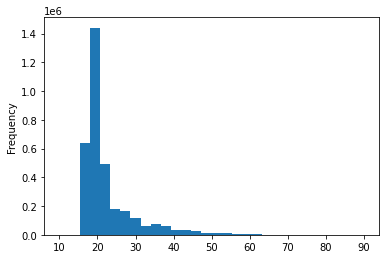

In [ ]:
pdf["NU_IDADE"].plot(kind='hist', bins=30)

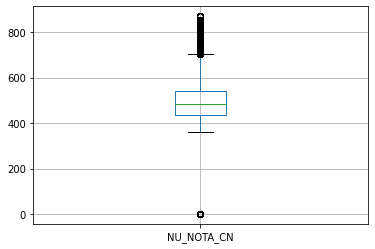

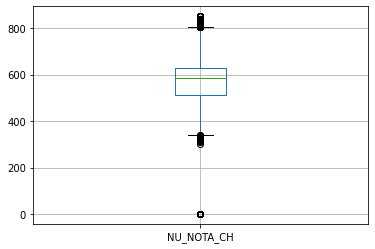

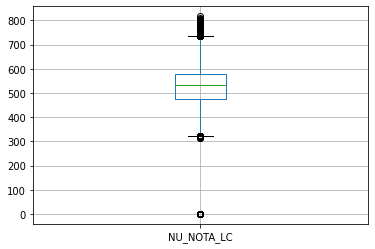

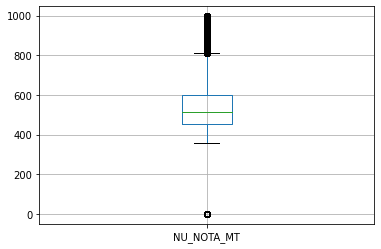

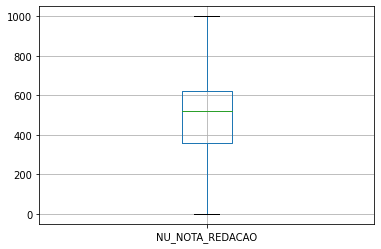

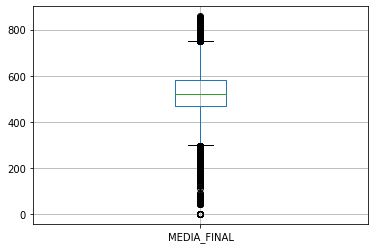

In [ ]:
for column in pd_notas:
    test = plt.figure()
    pd_notas.boxplot([column])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

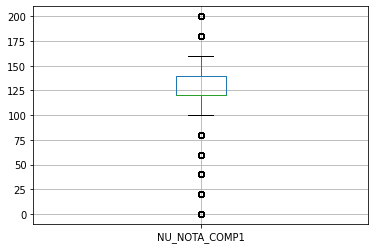

<Figure size 432x288 with 0 Axes>

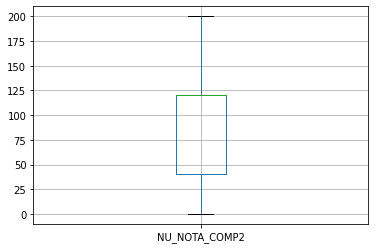

<Figure size 432x288 with 0 Axes>

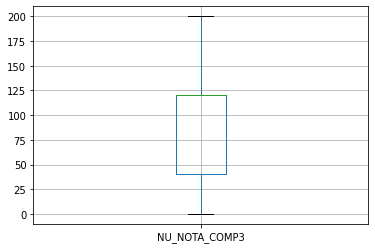

<Figure size 432x288 with 0 Axes>

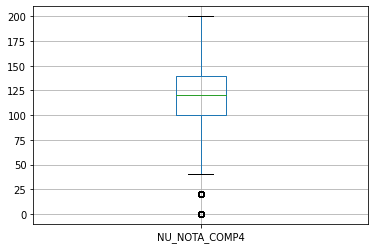

<Figure size 432x288 with 0 Axes>

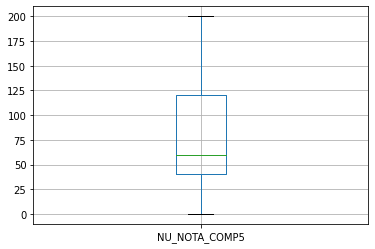

In [ ]:
for column in pd_comp:
    plt.figure()
    pd_comp.boxplot([column])

In [ ]:
from google.colab import files

test = plt.figure()
plt.savefig('test.pdf')

files.download('test.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

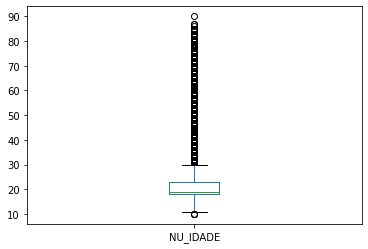

In [ ]:
pdf.plot(kind='box');

In [ ]:
pdf.describe()

,NU_IDADE
count,3369072.000000
mean,22.106372
std,7.263576
min,10.000000
25%,18.000000
50%,19.000000
75%,23.000000
max,90.000000


Amplitude

In [ ]:
pdf.describe().loc['max'] - pdf.describe().loc['min']


NU_IDADE   80.000000
dtype: float64

In [ ]:
pd_notas.describe().loc['max'] - pd_notas.describe().loc['min']

NU_NOTA_CN         869.600000
NU_NOTA_CH         850.400000
NU_NOTA_LC         816.900000
NU_NOTA_MT         996.100000
NU_NOTA_REDACAO   1000.000000
MEDIA_FINAL        858.180000
dtype: float64

In [ ]:
pd_comp.describe().loc['max'] - pd_comp.describe().loc['min']

NU_NOTA_COMP1   200.000000
NU_NOTA_COMP2   200.000000
NU_NOTA_COMP3   200.000000
NU_NOTA_COMP4   200.000000
NU_NOTA_COMP5   200.000000
dtype: float64

Coeficiente de variação

In [ ]:
for column in pd_comp:
  coef_var = (pd_comp[column].std() / pd_comp[column].mean()) * 100
  print(coef_var,column)

24.279204753597973 NU_NOTA_COMP1
47.89359508608001 NU_NOTA_COMP2
47.49798304286322 NU_NOTA_COMP3
28.891505246012656 NU_NOTA_COMP4
71.89743601988594 NU_NOTA_COMP5


In [ ]:
for column in pd_notas:
  coef_var = (pd_notas[column].std() / pd_notas[column].mean()) * 100
  print(coef_var, column)

15.132694192427554 NU_NOTA_CN
13.90590440999426 NU_NOTA_CH
13.72561240444115 NU_NOTA_LC
19.309225243276828 NU_NOTA_MT
35.793246831669265 NU_NOTA_REDACAO
15.717261745962787 MEDIA_FINAL


In [ ]:
coef_var = (pdf.std() / pdf.mean()) * 100
print(coef_var)

NU_IDADE   32.857385
dtype: float64


Balanceamento - Undersampling - https://medium.com/@junwan01/oversampling-and-undersampling-with-pyspark-5dbc25cdf253

In [ ]:
from pyspark.sql.functions import col, explode, array, lit

In [ ]:
major_df = df.filter(col("Classificado") == 0)
minor_df = df.filter(col("Classificado") == 1)
ratio = int(major_df.count()/minor_df.count())
print("ratio: {}".format(ratio))

ratio: 4


In [ ]:
print(minor_df)

591116


In [ ]:
sampled_majority_df = major_df.sample(False, 1/ratio,seed=123)
df_final = sampled_majority_df.unionAll(minor_df)
df_final.show()

+-----------------------+----------------+--------+-------+---------------+-----------+----------------+-----------------------+----------------+---------------+---------------+---------+---------+------------------+---------+----------------------+------------------+------------------+-----------+----------+----------+----------+----------+---------+-----------------+-------------+-------------+-------------+-------------+-------------+---------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----------+------------+
|NO_MUNICIPIO_RESIDENCIA|SG_UF_RESIDENCIA|NU_IDADE|TP_SEXO|TP_ESTADO_CIVIL|TP_COR_RACA|TP_NACIONALIDADE|NO_MUNICIPIO_NASCIMENTO|SG_UF_NASCIMENTO|TP_ST_CONCLUSAO|TP_ANO_CONCLUIU|TP_ESCOLA|TP_ENSINO|  NO_MUNICIPIO_ESC|SG_UF_ESC|TP_DEPENDENCIA_ADM_ESC|TP_LOCALIZACAO_ESC|NO_MUNICIPIO_PROVA|SG_UF_PROVA|NU_NOTA_CN|NU_NOTA_CH|NU_NOTA_LC|NU_NOTA_MT|TP_LINGUA|TP_STATUS_REDACAO|NU_NOTA_COM

In [ ]:
df_final.count()

1286249

In [ ]:
df_classificados = df_final.filter(col("Classificado") == 0)

In [ ]:
df_classificados.count()

695133

In [ ]:
df_desclass = df_final.filter(col("Classificado") == 1)

Converter para pandas para exportar

In [ ]:
df_pandas_class = df_classificados.select("*").toPandas()

NameError: ignored

In [ ]:
df_pandas_des = df_desclass.select("*").toPandas()

Devido a erro de memória, foi divido em classificados e classificados - ver jupyter notebook

In [ ]:
df_pandas_class.to_csv('classificados.csv')

In [ ]:
df_pandas_des.to_csv('desclassificados.csv')